In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('EV_Population.csv')

In [7]:
df.head()

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92676 entries, 0 to 92675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    92676 non-null  object 
 1   Model Year               92676 non-null  int64  
 2   Make                     92676 non-null  object 
 3   Electric Vehicle Type    92676 non-null  object 
 4   Electric Range           92676 non-null  int64  
 5   Base MSRP                92676 non-null  int64  
 6   Legislative District     92676 non-null  float64
 7   CAFV Eligibility Simple  92676 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


# Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,92676.0,2018.914940,3.277110,1999.0,2017.0,2019.0,2021.0,2025.0
Electric Range,92676.0,115.509388,98.815377,6.0,30.0,73.0,215.0,337.0
Base MSRP,92676.0,2018.564461,11390.579691,0.0,0.0,0.0,0.0,845000.0
Legislative District,92676.0,28.506798,14.649595,1.0,17.0,32.0,41.0,49.0


In [14]:
print("=== Basic Dataset Overview ===")
print(f"Total number of vehicles: {len(df):,}")
print(f"Year range: {df['Model Year'].min()} - {df['Model Year'].max()}")
print("\nAverage Electric Range: {:.1f} miles".format(df['Electric Range'].mean()))
print("Median Electric Range: {} miles".format(df['Electric Range'].median()))
print("\nAverage Base MSRP: ${:,.2f}".format(df['Base MSRP'].mean()))
print("Median Base MSRP: ${:,.2f}".format(df['Base MSRP'].median()))

# Vehicle type distribution
print("\n=== Electric Vehicle Type Distribution ===")
print(df['Electric Vehicle Type'].value_counts())

=== Basic Dataset Overview ===
Total number of vehicles: 92,676
Year range: 1999 - 2025

Average Electric Range: 115.5 miles
Median Electric Range: 73.0 miles

Average Base MSRP: $2,018.56
Median Base MSRP: $0.00

=== Electric Vehicle Type Distribution ===
Electric Vehicle Type
BEV     46798
PHEV    45878
Name: count, dtype: int64


# Market Share

<Figure size 1200x600 with 0 Axes>

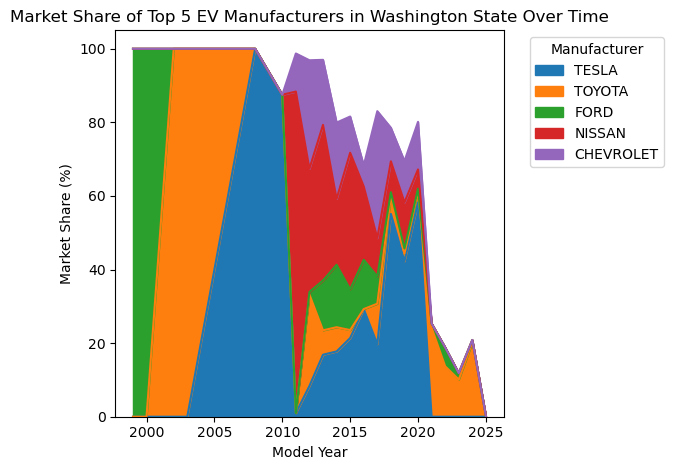

Market Share for 2025:
Make
FORD         0.225225
TESLA        0.000000
TOYOTA       0.000000
NISSAN       0.000000
CHEVROLET    0.000000
Name: 2025, dtype: float64


In [17]:
market_share = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Calculate the percentage market share
market_share_pct = market_share.div(market_share.sum(axis=1), axis=0) * 100

# Select top 5 manufacturers by total market share
top_manufacturers = market_share_pct.sum().nlargest(5).index

# Filter data for top manufacturers
market_share_top = market_share_pct[top_manufacturers]

# Create a stacked area plot
plt.figure(figsize=(12, 6))
market_share_top.plot(kind='area', stacked=True)

plt.title('Market Share of Top 5 EV Manufacturers in Washington State Over Time')
plt.xlabel('Model Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the market share for the latest year
latest_year = market_share_top.index.max()
print(f"Market Share for {latest_year}:")
print(market_share_top.loc[latest_year].sort_values(ascending=False))

# Top manufacturers¶


=== Top 10 Manufacturers ===
Make
TESLA        25228
NISSAN       10406
CHEVROLET     9697
TOYOTA        7585
BMW           6075
JEEP          5646
KIA           4451
FORD          3912
CHRYSLER      3700
VOLVO         3630
Name: count, dtype: int64


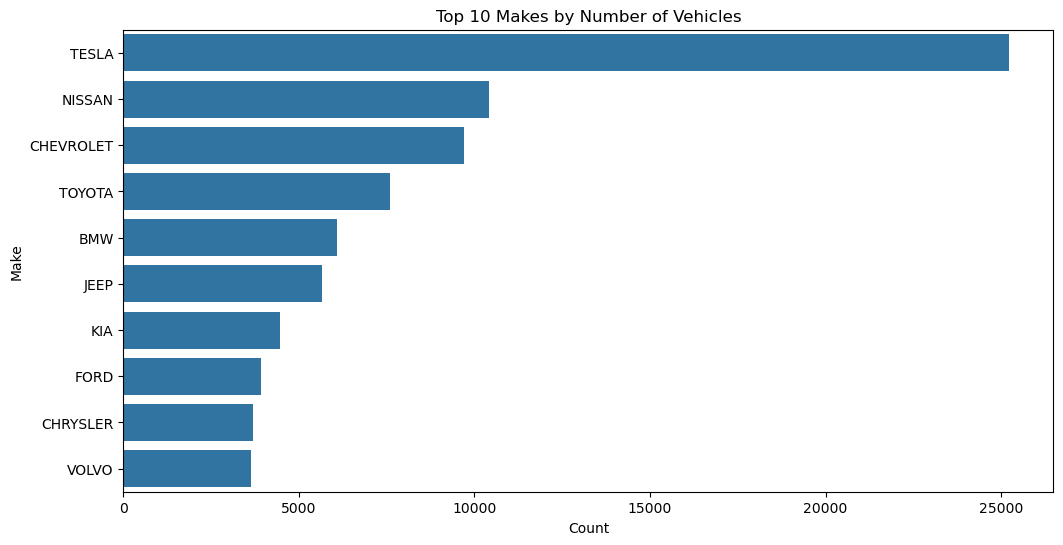

In [20]:
# Top manufacturers analysis
print("\n=== Top 10 Manufacturers ===")
top_makes = df['Make'].value_counts().head(10)
print(top_makes)

# Visualize top manufacturers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Makes by Number of Vehicles')
plt.xlabel('Count')
plt.show()

# Tesla's Market Share¶

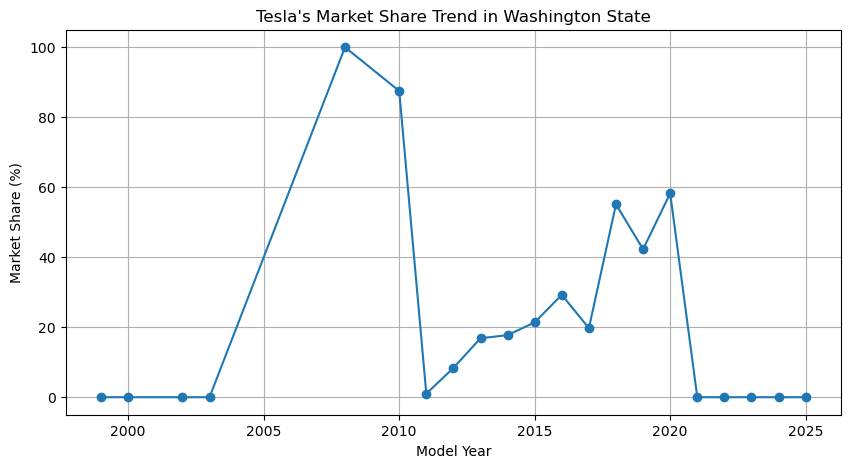

In [23]:
# Plot trend for a specific manufacturer (e.g., Tesla)
plt.figure(figsize=(10, 5))
plt.plot(market_share_top.index, market_share_top['TESLA'], marker='o')
plt.title("Tesla's Market Share Trend in Washington State")
plt.xlabel('Model Year')
plt.ylabel('Market Share (%)')
plt.grid(True)
plt.show()

# Distribution Analysis


=== Top 10 Makes by Average Range ===
                            mean  median  count
Make                                           
TESLA                 241.207389   220.0  25228
JAGUAR                234.000000   234.0    201
POLESTAR              233.000000   233.0    145
CHEVROLET             143.176034    82.0   9697
VOLKSWAGEN            107.307692   125.0   1092
NISSAN                105.197482    84.0  10406
WHEEGO ELECTRIC CARS  100.000000   100.0      3
TH!NK                 100.000000   100.0      5
FIAT                   86.198925    87.0    558
HYUNDAI                83.049656    33.0   1309


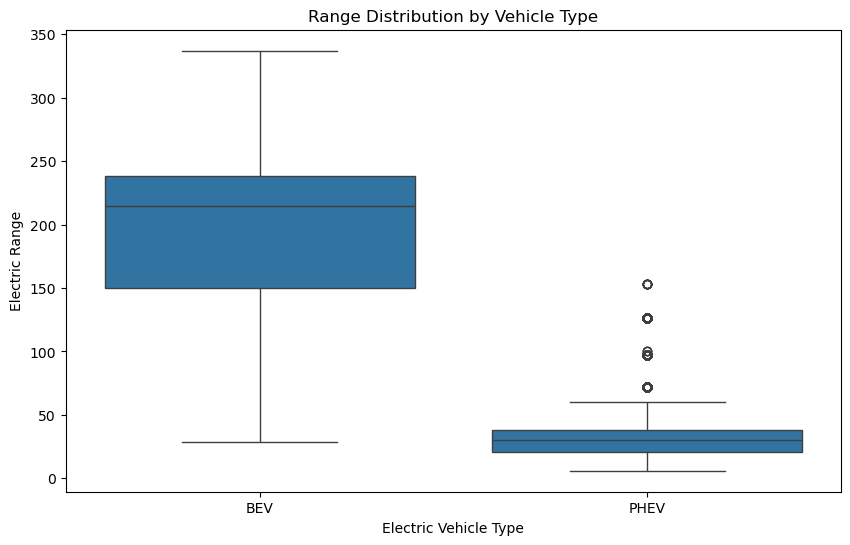

In [26]:
# Range analysis by manufacturer
range_by_make = df.groupby('Make')['Electric Range'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("\n=== Top 10 Makes by Average Range ===")
print(range_by_make.head(10))

# Visualize range distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range')
plt.title('Range Distribution by Vehicle Type')
plt.show()

# Price Analysis¶


=== Price Distribution Statistics ===
count     92676.000000
mean       2018.564461
std       11390.579691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64


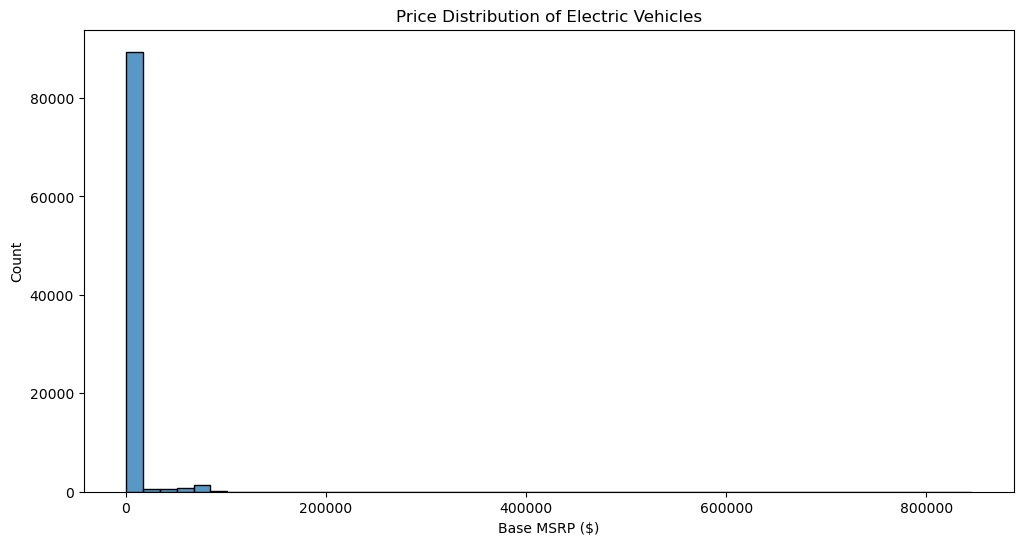


=== Top 10 Makes by Average Price ===
Make
FISKER                  102000.000000
SUBARU                   34995.000000
WHEEGO ELECTRIC CARS     32995.000000
MINI                     17218.562874
CADILLAC                  9902.637363
PORSCHE                   5813.992762
VOLVO                     4798.498623
BMW                       4267.711934
KIA                       4204.875309
TESLA                     4181.252973
Name: Base MSRP, dtype: float64


In [29]:
# Price distribution analysis
print("\n=== Price Distribution Statistics ===")
print(df['Base MSRP'].describe())

# Visualize price distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Base MSRP', bins=50)
plt.title('Price Distribution of Electric Vehicles')
plt.xlabel('Base MSRP ($)')
plt.show()

# Average price by manufacturer (top 10)
price_by_make = df.groupby('Make')['Base MSRP'].mean().sort_values(ascending=False).head(10)
print("\n=== Top 10 Makes by Average Price ===")
print(price_by_make)

# Temporal Analysis


=== Yearly Trends ===
            Electric Range  Base MSRP   Make
Model Year                                  
1999                 74.00       0.00      2
2000                 58.00       0.00      7
2002                 95.00       0.00      2
2003                 95.00       0.00      1
2008                220.00   98950.00     22
2010                226.88  101205.62     24
2011                 70.90    1096.26    696
2012                 61.27    5740.82   1531
2013                 80.16   11779.05   4243
2014                 79.68   12399.97   3433
2015                 96.71     180.36   4685
2016                101.88    2217.51   5431
2017                116.35    1149.15   8294
2018                156.66    2456.30  14214
2019                175.82    1947.83  10826
2020                239.21     159.97  12167
2021                 47.48       0.00   4725
2022                 28.98       0.00   4559
2023                 30.04       0.00   7711
2024                 33.02      

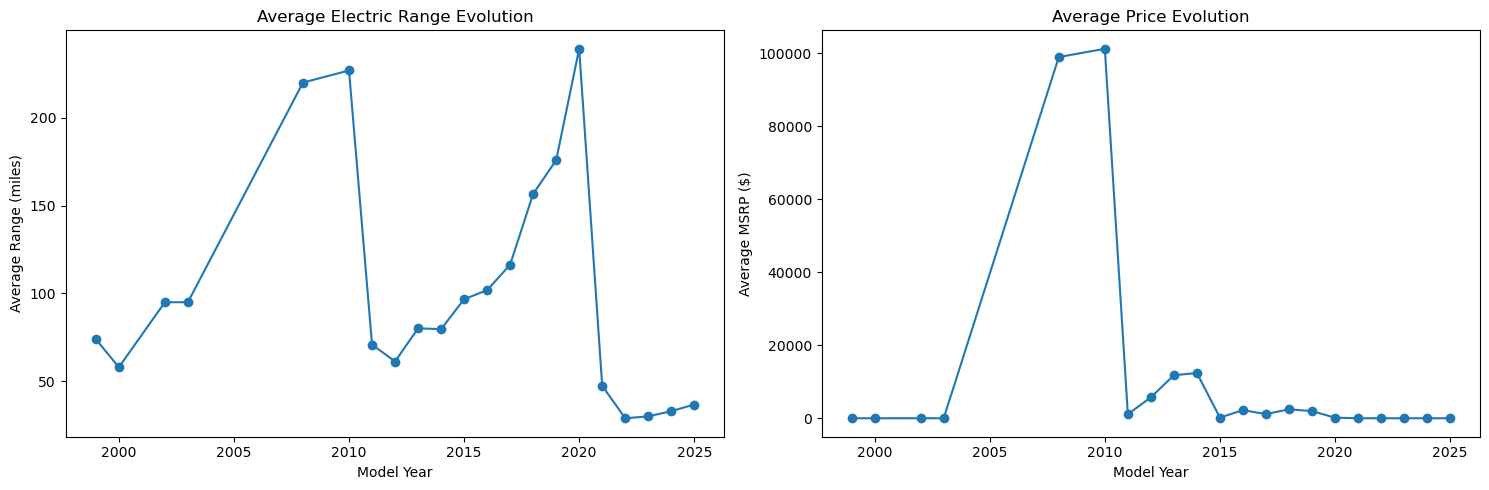

In [32]:
# Analysis by year
yearly_stats = df.groupby('Model Year').agg({
    'Electric Range': 'mean',
    'Base MSRP': 'mean',
    'Make': 'count'
}).round(2)

print("\n=== Yearly Trends ===")
print(yearly_stats)

# Visualize temporal trends
plt.figure(figsize=(15, 5))

# Range evolution
plt.subplot(1, 2, 1)
yearly_stats['Electric Range'].plot(kind='line', marker='o')
plt.title('Average Electric Range Evolution')
plt.xlabel('Model Year')
plt.ylabel('Average Range (miles)')

# Price evolution
plt.subplot(1, 2, 2)
yearly_stats['Base MSRP'].plot(kind='line', marker='o')
plt.title('Average Price Evolution')
plt.xlabel('Model Year')
plt.ylabel('Average MSRP ($)')

plt.tight_layout()
plt.show()

# Prepare data for modeling

In [37]:
def prepare_data(df):
   
    # Create a copy of the DataFrame
    model_df = df.copy()
    
    # Convert categorical variables using Label Encoding
    le = LabelEncoder()
    categorical_cols = ['State', 'Make', 'Electric Vehicle Type', 'CAFV Eligibility Simple']
    
    for col in categorical_cols:
        model_df[col + '_encoded'] = le.fit_transform(model_df[col])
    
    # Select features for prediction
    features = [
        'Model Year',
        'Electric Range',
        'Legislative District',
        'Make_encoded',
        'Electric Vehicle Type_encoded',
        'CAFV Eligibility Simple_encoded'
    ]
    
    X = model_df[features]
    y = model_df['Base MSRP']
    
    return X, y

# Train Model

In [40]:
def train_model(X, y):
    """
    Train and evaluate the model
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return {
        'model': rf_model,
        'scaler': scaler,
        'predictions': y_pred,
        'actual': y_test,
        'rmse': rmse,
        'r2': r2,
        'feature_importance': feature_importance
    }

Starting the price prediction model pipeline...

Model Performance Metrics:
RMSE: $4,210.58
R² Score: 0.8447

Feature Importance:
                           feature  importance
1                   Electric Range    0.702055
0                       Model Year    0.143651
3                     Make_encoded    0.104950
2             Legislative District    0.027068
5  CAFV Eligibility Simple_encoded    0.018461
4    Electric Vehicle Type_encoded    0.003815


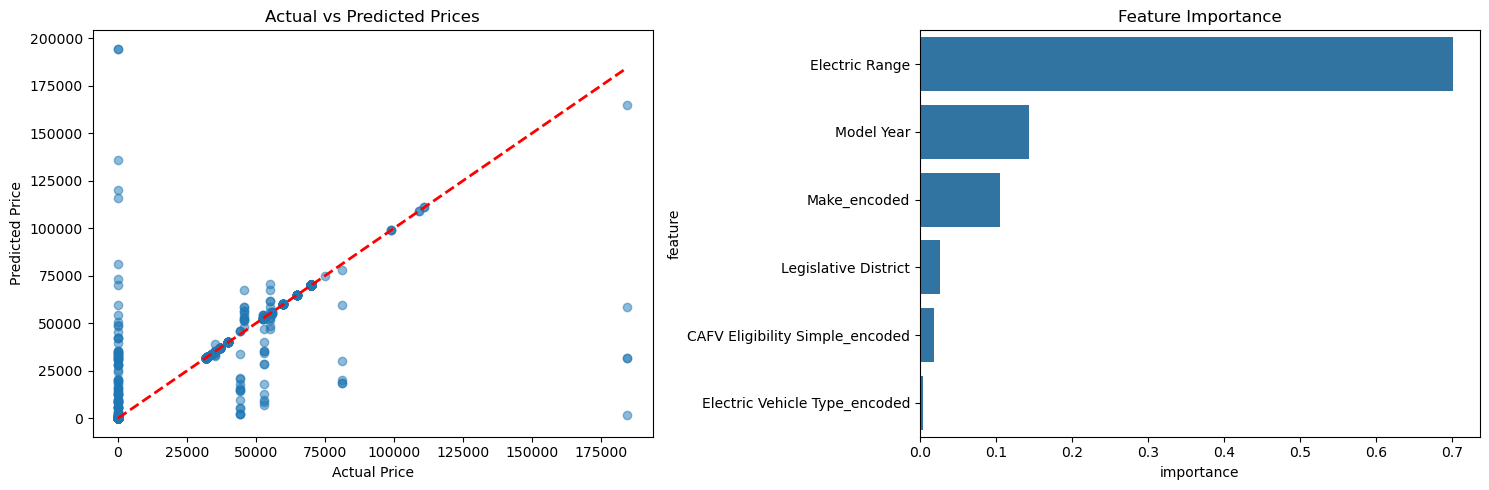

In [42]:
def visualize_results(results):
    """
    Visualize model results
    """
    plt.figure(figsize=(15, 5))
    
    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(results['actual'], results['predictions'], alpha=0.5)
    plt.plot([results['actual'].min(), results['actual'].max()], 
             [results['actual'].min(), results['actual'].max()], 
             'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    
    # Feature Importance
    plt.subplot(1, 2, 2)
    sns.barplot(x='importance', y='feature', data=results['feature_importance'])
    plt.title('Feature Importance')
    
    plt.tight_layout()
    plt.show()



# Run the entire pipeline
print("Starting the price prediction model pipeline...")

# Prepare the data
X, y = prepare_data(df)

# Train the model and get results
results = train_model(X, y)

# Print metrics
print("\nModel Performance Metrics:")
print(f"RMSE: ${results['rmse']:,.2f}")
print(f"R² Score: {results['r2']:.4f}")

# Display feature importance
print("\nFeature Importance:")
print(results['feature_importance'])

# Visualize results
visualize_results(results)